In [ ]:
#1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
#2: Load your file
from google.colab import files
uploaded = files.upload()

Saving nextword.txt to nextword.txt


In [ ]:
#3: Open and pre-process the data
file = open("nextword.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

"THE ADVENTURES OF SHERLOCK HOLMES Arthur Conan Doyle Table of contents A Scandal in Bohemia The Red-Headed League A Case of Identity The Boscombe Valley Mystery The Five Orange Pips The Man with the Twisted Lip The Adventure of the Blue Carbuncle The Adventure of the Speckled Band The Adventure of the Engineer's Thumb The Adventure of the Noble Bachelor The Adventure of the Beryl Coronet The Adventure of the Copper Beeches A SCANDAL IN BOHEMIA Table of contents Chapter 1 Chapter 2 Chapter 3 CHAP"

In [ ]:
len(data)

559685

In [ ]:
#4: Implement tokenization and make additional adjustments
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 1561, 5, 129, 34, 647, 4498, 4499, 226, 5, 1562, 6, 827, 7, 871]

In [ ]:
len(sequence_data)

105879

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8200


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  105876


array([[   1, 1561,    5,  129],
       [1561,    5,  129,   34],
       [   5,  129,   34,  647],
       [ 129,   34,  647, 4498],
       [  34,  647, 4498, 4499],
       [ 647, 4498, 4499,  226],
       [4498, 4499,  226,    5],
       [4499,  226,    5, 1562],
       [ 226,    5, 1562,    6],
       [   5, 1562,    6,  827]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1 1561    5]
 [1561    5  129]
 [   5  129   34]
 [ 129   34  647]
 [  34  647 4498]
 [ 647 4498 4499]
 [4498 4499  226]
 [4499  226    5]
 [ 226    5 1562]
 [   5 1562    6]]
Response:  [ 129   34  647 4498 4499  226    5 1562    6  827]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Creating the model
model = Sequential()
model.add(Embedding(vocab_size, 10))
model.add(LSTM(512, return_sequences=True))  # Reduced to 512 units
model.add(LSTM(512))  # Reduced to 512 units
model.add(Dense(512, activation="relu"))  # Reduced to 512 units
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
# Build the model with dummy input data for the summary
model.build(input_shape=(None, 3))  # input_shape here is (batch_size, input_length)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 3, 10)               │          82,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 3, 512)              │       1,071,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 512)                 │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8200)                │       4,206,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,721,560 (29.46 MB)

 Trainable params: 7,721,560 (29.46 MB)

 Non-trainable params: 0 (0.00 B)

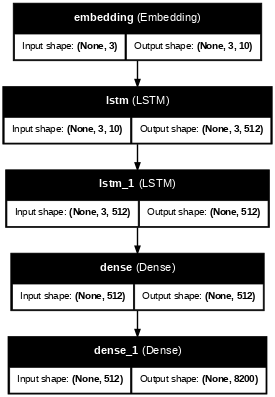

In [ ]:
#plot the model
from tensorflow.keras.utils import plot_model

# Plot the model with a lower dpi (decreases size)
plot_model(model, to_file='plot.png', show_layer_names=True, show_shapes=True, dpi=50)


In [ ]:
#Build model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define ModelCheckpoint to save the best model based on loss
checkpoint = ModelCheckpoint("next_words.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])


Epoch 1/70
1651/1655 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7278
Epoch 1: loss improved from inf to 6.43316, saving model to next_words.keras
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 6.7269
Epoch 2/70
1651/1655 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8994
Epoch 2: loss improved from 6.43316 to 5.85711, saving model to next_words.keras
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 5.8993
Epoch 3/70
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5155
Epoch 3: loss improved from 5.85711 to 5.51482, saving model to next_words.keras
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.5155
Epoch 4/70
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2570
Epoch 4: loss improved from 5.51482 to 5.26903, saving model to next_words.keras
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 5.2570
Epoch 5/70
1652/1655 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0488
Epoch 5: loss improved from 5.26903 to 5.05661, saving model to next_words.keras
1655/1655

In [ ]:
#Prediction
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue


Enter your line: To Sherlock Holmes
['To', 'Sherlock', 'Holmes']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
esq
Enter your line: love for Irene
['love', 'for', 'Irene']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
adler
Enter your line: perfect reasoning and
['perfect', 'reasoning', 'and']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
observing
Enter your line: distracting factor which
['distracting', 'factor', 'which']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
might
Enter your line: 0
Execution completed.....
